This has a couple of assumptions built in.  The data that I have is an aggregate of downloads and visits to these datasets.  So I can't see how many of these downloads and visits happened recently.  If all the visits happened in 1999 then it might still be a popular dataset.  So I used the "Last updated date" to help modify importance score.

In [129]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import matplotlib
import math
%matplotlib inline

In [106]:
assets = pd.read_csv('Asset_Inventory_20170221.csv')
G = nx.Graph()

In [107]:
assets.columns

Index(['URL', 'U ID', 'Public', 'Derived View', 'Parent UID', 'Domain', 'Type',
       'Name', 'Visits', 'Creation Date', 'Last Update Date (data)',
       'Category', 'Keywords', 'Downloads', 'Owner', 'Contact Email',
       'License', 'Publication Stage', 'Published Version Name',
       'Published Version UID', 'Data Provided By', 'Source Link',
       'Department', 'Dataset Page', 'routing_approval', 'api_endpoint',
       'Frequency', 'capabilities', 'test', 'definitionExpression', 'maxScale',
       'htmlPopupType', 'copyrightText', 'geometryType', 'hasAttachments',
       'Publishing Department', 'defaultVisibility', 'id',
       'Spatial Reference wkid', 'Source', 'displayField', 'minScale',
       'currentVersion', 'Agency', 'Category Tile', 'Tags', 'Microsite',
       'owner_uid', 'View Moderation Status', 'provenance'],
      dtype='object')

In [108]:
#munging
assets['Creation Date'] = pd.to_datetime(assets['Creation Date'])
assets['Last Update Date (data)'] = pd.to_datetime(assets['Last Update Date (data)'])

In [109]:
assets['Last Update Date (data)'] = assets[['Last Update Date (data)', 'Creation Date']].max(axis=1)
#assets['']
assets['Creation Date'] = assets[['Last Update Date (data)', 'Creation Date' ]].min(axis=1)
assets['updated_over_time'] = assets['Last Update Date (data)'] - assets['Creation Date']

In [110]:
relivant_data = assets[assets['Derived View']==True][['U ID', 'Parent UID','Visits', 'Downloads','updated_over_time', 'Last Update Date (data)']]
relivant_data.head()

,U ID,Parent UID,Visits,Downloads,updated_over_time,Last Update Date (data)
107,3xwc-76cx,6v78-dj3u,1254,7,207 days 23:11:00,2014-11-17 15:37:00
115,4dx8-qze7,6v78-dj3u,138,32,209 days 18:58:00,2014-11-17 15:37:00
275,amh5-bifm,ecmv-9xxi,991,911,1738 days 02:19:00,2017-02-15 17:06:00
276,szku-46rx,64cq-wf5u,19142,599,0 days 00:00:00,2012-04-05 15:57:00
277,nq9x-w8sx,5tye-7ray,401,76,1669 days 11:16:00,2017-02-14 02:15:00


This next step gives more weight to the scores of recently updated info.

In [131]:
min_max_scaler = preprocessing.MinMaxScaler()
relivant_data['normalized_Last_Update_Date']=min_max_scaler.fit_transform(relivant_data['Last Update Date (data)'].dt.normalize())
# I went with a sigmoid rather than tanh or a linear progression to give old data the boot.
relivant_data['score'] = (relivant_data.Visits+relivant_data.Downloads) * (1/math.e ** (-relivant_data['normalized_Last_Update_Date'])) 
relivant_data[['U ID', 'Parent UID','score']].values

/Users/jlangley/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/jlangley/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/jlangley/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATI

array([['3xwc-76cx', '6v78-dj3u', 2208.8652333372015],
       ['4dx8-qze7', '6v78-dj3u', 297.7851623055704],
       ['amh5-bifm', 'ecmv-9xxi', 5153.715270623804],
       ..., 
       ['vrv3-n568', 'jghs-fiqn', 295.52200235368923],
       ['q47d-gzx4', 'daek-f7x4', 482.8423005220233],
       ['784c-peg7', 'daek-f7x4', 646.1223055294709]], dtype=object)

In [139]:
G.add_weighted_edges_from(relivant_data[['U ID', 'Parent UID','score']].values)
G.edges(data= True)

[('3xwc-76cx', '6v78-dj3u', {'weight': 2208.8652333372015}),
 ('6v78-dj3u', '4dx8-qze7', {'weight': 297.7851623055704}),
 ('6v78-dj3u', 'y7sc-fuw2', {'weight': 11599.607910514631}),
 ('6v78-dj3u', '958q-vfmc', {'weight': 5530.045631756975}),
 ('6v78-dj3u', 'sxys-gvph', {'weight': 336.3220656627619}),
 ('6v78-dj3u', '8c3v-s38w', {'weight': 7281.72305708386}),
 ('6v78-dj3u', 'x9p8-jh8i', {'weight': 357.3421947666845}),
 ('6v78-dj3u', '8fpd-xrx2', {'weight': 18180.659997467737}),
 ('6v78-dj3u', 'g2wd-u99k', {'weight': 238.22812984445633}),
 ('6v78-dj3u', 't44j-ignp', {'weight': 313.5502591335124}),
 ('6v78-dj3u', '37uv-2y98', {'weight': 8364.259705935874}),
 ('6v78-dj3u', '9yz6-h9i6', {'weight': 239.9798072697832}),
 ('6v78-dj3u', 'bq5e-x7ce', {'weight': 3252.864978832025}),
 ('6v78-dj3u', 'csws-hs3u', {'weight': 341.57709793874255}),
 ('6v78-dj3u', 'c8f7-fsqr', {'weight': 303.0401945815511}),
 ('6v78-dj3u', 'mnxi-tktf', {'weight': 22822.605174583983}),
 ('6v78-dj3u', '9it5-vdbe', {'weigh

# Visuals time:

/Users/jlangley/miniconda3/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/jlangley/miniconda3/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/jlangley/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/jlangley/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is depreca

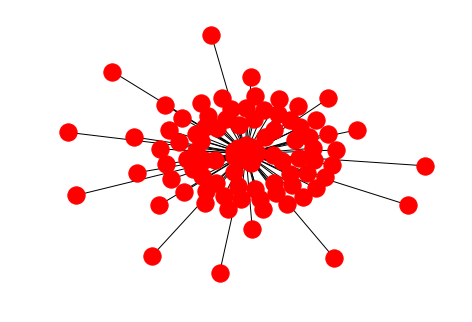

In [133]:
third_largest_cc = sorted(nx.connected_component_subgraphs(G), key=len)[-3]
nx.draw(third_largest_cc)

### there are groups in the dataset like the one pictured above. This next section looks for the center points in order to raise its importance score.  Hint: Don't delete the one in the center as all the other tables depend on it.

In [134]:
my_list= []
for node in G.nodes_iter():
    total_for_node = sum(x[2]['weight'] for x in G.edges(node, data=True))
    my_list.append((node, total_for_node))

temp_thing =  pd.DataFrame(my_list, columns = ['node', 'score'])
temp_thing.head()

,node,score
0,3xwc-76cx,2208.865233
1,6v78-dj3u,162884.846775
2,4dx8-qze7,297.785162
3,amh5-bifm,5153.715271
4,ecmv-9xxi,67076.877773


In [135]:
degrees = pd.DataFrame([(G.degree(x),x) for x in G.nodes()], columns=['dependent views','UID'])

In [136]:
s = pd.merge(assets, degrees, left_on='U ID', right_on='UID', how='inner')
s = pd.merge(s,temp_thing, left_on='UID', right_on='node', how='inner')

# The Final Result:

In [140]:
s[['score','UID','Name','Domain','owner_uid']].sort_values('score', ascending = False)

,score,UID,Name,Domain,owner_uid
80,898763.570862,xaxa-886r,Austin Pool Schedule,data.austintexas.gov,rxw3-i2wi
387,898750.286469,jfqh-bqzu,Pool Map,data.austintexas.gov,rxw3-i2wi
72,332096.224560,3e38-4hji,Austintexas.gov - Top 10 Searches,data.austintexas.gov,czye-wfgc
288,332090.831155,q37s-pqpu,Top-10-Searches-Chart,data.austintexas.gov,czye-wfgc
3,314374.831570,5tye-7ray,Water Quality Sampling Data,data.austintexas.gov,buxt-jupg
337,250518.417163,z28n-wkkw,Citywide_EII_Ecoli_2011_timeline_graph,data.austintexas.gov,buxt-jupg
201,218879.978639,ys38-3nde,City of Austin Parks,data.austintexas.gov,wpqw-45f6
1539,203823.438490,w4x7-gfja,DIR Cooperative Contract Sales Data – Fiscal 2...,data.texas.gov,2ubv-funn
14,179300.431018,kz4x-q9k5,Austin Animal Center Stray Map,data.austintexas.gov,p3dk-w2wy
237,170957.021968,hye6-gvq2,Austin Animal Center Found Pets Map,data.austintexas.gov,p3dk-w2wy


everything under here was extra junk and intermediate results (scratch area)

In [79]:
s[s['dependent views']>1][['Name','Domain','Visits','dependent views']].sort_values(['dependent views', 'Visits'], ascending=False)

,Name,Domain,Visits,dependent views
27,2015 Annual Performance Report Key Indicators,data.austintexas.gov,509,125
32,Issued Construction Permits,data.austintexas.gov,7638,118
3,Water Quality Sampling Data,data.austintexas.gov,10712,102
1539,DIR Cooperative Contract Sales Data – Fiscal 2...,data.texas.gov,12703,93
6,311 Unified Data,data.austintexas.gov,8591,87
1541,Registered Boats,data.texas.gov,4064,64
1,Restaurant Inspection Scores,data.austintexas.gov,26381,60
41,2015-08-15 Austin Sustainability Indicators,data.austintexas.gov,646,49
14,Austin Animal Center Stray Map,data.austintexas.gov,2943,42
45,Bond Program Spending Summary,data.austintexas.gov,653,42


In [80]:
assets[assets['U ID'] =="dgbw-ce4x"]

,URL,U ID,Public,Derived View,Parent UID,Domain,Type,Name,Visits,Creation Date,...,minScale,currentVersion,Agency,Category Tile,Tags,Microsite,owner_uid,View Moderation Status,provenance,updated_over_time
50,https://data.austintexas.gov/d/dgbw-ce4x,dgbw-ce4x,True,False,NaN,data.austintexas.gov,dataset,2015 Annual Performance Report Key Indicators,509,2016-04-22 21:59:00,...,NaN,NaN,NaN,NaN,NaN,NaN,gzfz-ijhr,Not in Queue,official,25 days 16:18:00


In [81]:
assets[assets['Parent UID'].isnull()].head(2)

,URL,U ID,Public,Derived View,Parent UID,Domain,Type,Name,Visits,Creation Date,...,minScale,currentVersion,Agency,Category Tile,Tags,Microsite,owner_uid,View Moderation Status,provenance,updated_over_time
0,https://data.austintexas.gov/d/iyf6-bziq,iyf6-bziq,True,False,NaN,data.austintexas.gov,gis map,Off- Leash Areas,65856,2013-05-30 14:58:00,...,NaN,NaN,NaN,NaN,NaN,NaN,czye-wfgc,Not in Queue,official,1186 days 07:08:00
1,https://data.austintexas.gov/d/b4y9-5x39,b4y9-5x39,True,False,NaN,data.austintexas.gov,dataset,APD Incident Extract YTD,33021,2011-12-16 15:53:00,...,NaN,NaN,NaN,NaN,NaN,NaN,99uc-9byy,Not in Queue,official,1707 days 21:50:00


In [82]:
assets.Agency[assets.Agency.notnull()].unique()

array(['Texas Department of Licensing and Regulation',
       'Texas Department of Information Resources',
       'Texas Comptroller of Public Accounts',
       'Texas Parks and Wildlife Department', 'Capital Metro',
       'Texas Racing Commission',
       'Texas Department of Family and Protective Services',
       'Texas Department of Agriculture',
       'Denton County Transportation Authority',
       'Texas Facilities Commission'], dtype=object)